In [3]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [9]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6921 - accuracy: 0.5541 - val_loss: 0.6911 - val_accuracy: 0.5858
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6883 - accuracy: 0.6212 - val_loss: 0.6850 - val_accuracy: 0.6472
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6660 - accuracy: 0.6629 - val_loss: 0.6328 - val_accuracy: 0.6922
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6056 - accuracy: 0.7272 - val_loss: 0.5964 - val_accuracy: 0.7326
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5811 - accuracy: 0.7459 - val_loss: 0.5774 - val_accuracy: 0.7430
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5622 - accuracy: 0.7570 - val_loss: 0.5627 - val_accuracy: 0.7522
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5459 - accuracy: 0.7655 - val_loss: 0.5462 - val_accuracy:

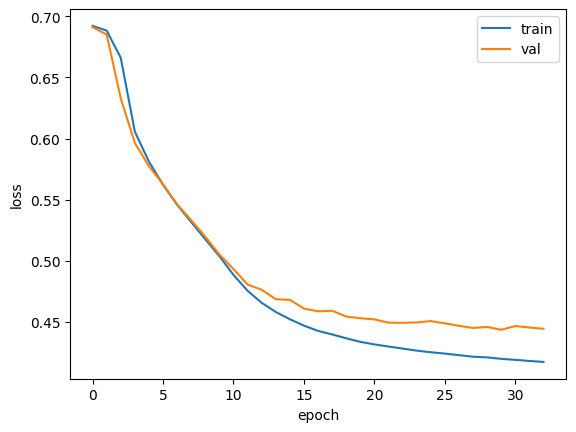

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3 ))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6922 - accuracy: 0.5418 - val_loss: 0.6914 - val_accuracy: 0.5784
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6887 - accuracy: 0.6123 - val_loss: 0.6853 - val_accuracy: 0.6518
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6670 - accuracy: 0.6729 - val_loss: 0.6363 - val_accuracy: 0.7040
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6190 - accuracy: 0.7064 - val_loss: 0.6066 - val_accuracy: 0.7218
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5972 - accuracy: 0.7210 - val_loss: 0.5878 - val_accuracy: 0.7334
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5774 - accuracy: 0.7373 - val_loss: 0.5699 - val_accuracy: 0.7420
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5576 - accuracy: 0.7488 - val_loss: 0.5504 - val_accuracy:

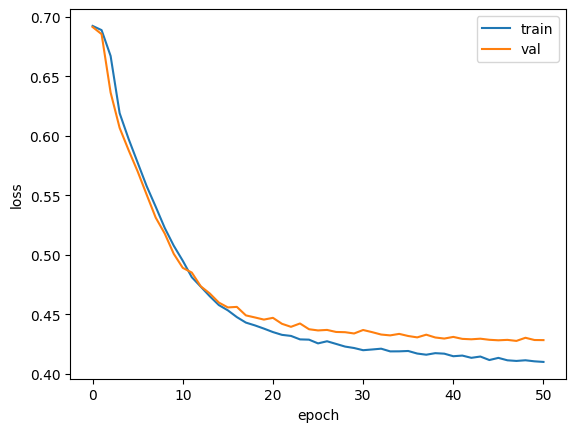

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [19]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [20]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6921 - accuracy: 0.5436 - val_loss: 0.6905 - val_accuracy: 0.5834
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6859 - accuracy: 0.6182 - val_loss: 0.6790 - val_accuracy: 0.6238
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6470 - accuracy: 0.6733 - val_loss: 0.5993 - val_accuracy: 0.7032
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5631 - accuracy: 0.7208 - val_loss: 0.5368 - val_accuracy: 0.7472
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5268 - accuracy: 0.7502 - val_loss: 0.5124 - val_accuracy: 0.7568
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5088 - accuracy: 0.7602 - val_loss: 0.4948 - val_accuracy: 0.7682
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4943 - accuracy: 0.7706 - val_loss: 0.4869 - val_accuracy:

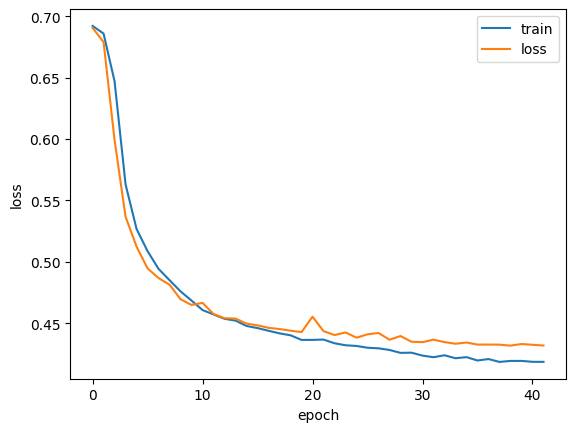

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','loss'])
plt.show()

In [23]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [24]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6922 - accuracy: 0.5400 - val_loss: 0.6911 - val_accuracy: 0.5722
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6897 - accuracy: 0.5799 - val_loss: 0.6884 - val_accuracy: 0.5948
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6857 - accuracy: 0.6044 - val_loss: 0.6839 - val_accuracy: 0.6064
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6794 - accuracy: 0.6202 - val_loss: 0.6767 - val_accuracy: 0.6162
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6695 - accuracy: 0.6309 - val_loss: 0.6662 - val_accuracy: 0.6244
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6547 - accuracy: 0.6488 - val_loss: 0.6490 - val_accuracy: 0.6408
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6309 - accuracy: 0.6691 - val_loss: 0.6211 - val_accuracy:

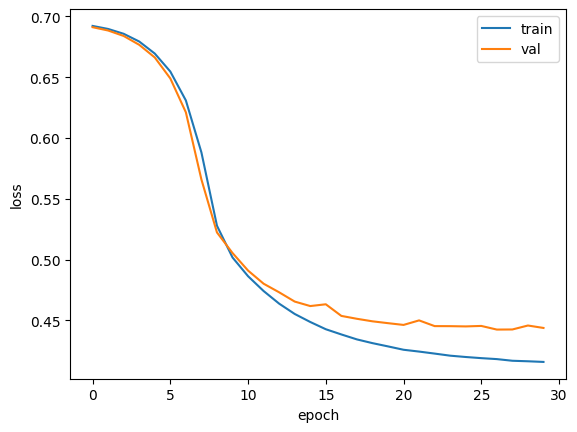

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [28]:
test_seq = pad_sequences(test_input, maxlen = 100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 7s 9ms/step - loss: 0.4264 - accuracy: 0.8013


[0.42636510729789734, 0.8012800216674805]